# Module21~30
## 20200817-20200822

1. re
1. nltk
1. snowNLP
1. jieba
1. xpinyin
1. phone
1. phonenumbers
1. chardet
1. thulac


---
## 3.0 基本字符操作

- 删除空格 `strip`
- 查找 `find` `in`
- 长度 `len`
- 统计 `.count`
- 替换 `replace`
- 切割 `.split`


In [4]:
#删除空格 strip
a = '   123123   '
print(a.strip())
print('---')

#查找 find in
print('hello' in 'hello World')
print('---')

# 长度 len
print(len(a))
print('---')

#统计 .count
print(a.count('1'))
print('---')

#替换 replace
print(a.replace('1','a'))
print('---')


#切割 .split
print(a.split('2'))

123123
---
True
---
12
---
2
---
   a23a23   
---
['   1', '31', '3   ']


## 3.21 re

In [ ]:
import re
re.match()
re.search()
re.sub()
re.split()


## 3.22 jieba
jieba分词

In [5]:

import jieba

strs=["我来到北京清华大学","乒乓球拍卖完了","中国科学技术大学"]
for str in strs:
    seg_list = jieba.cut(str) # 使用paddle模式
    print("Paddle Mode: " + '/'.join(list(seg_list)))

seg_list = jieba.cut("我来到北京清华大学", cut_all=True)
print("Full Mode: " + "/ ".join(seg_list))  # 全模式

seg_list = jieba.cut("我来到北京清华大学", cut_all=False)
print("Default Mode: " + "/ ".join(seg_list))  # 精确模式

seg_list = jieba.cut("他来到了网易杭研大厦")  # 默认是精确模式
print(", ".join(seg_list))

seg_list = jieba.cut_for_search("小明硕士毕业于中国科学院计算所，后在日本京都大学深造")  # 搜索引擎模式
print(", ".join(seg_list))

print('/'.join(jieba.cut('如果放到post中将出错。', HMM=False)))
#如果/放到/post/中将/出错/。
jieba.suggest_freq(('中', '将'), True)

print('/'.join(jieba.cut('如果放到post中将出错。', HMM=False)))
#如果/放到/post/中/将/出错/。

print('/'.join(jieba.cut('「台中」正确应该不会被切开', HMM=False)))
#「/台/中/」/正确/应该/不会/被/切开

jieba.suggest_freq('台中', True)
print('/'.join(jieba.cut('「台中」正确应该不会被切开', HMM=False)))
#「/台中/」/正确/应该/不会/被/切开

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.924 seconds.
Prefix dict has been built successfully.


Paddle Mode: 我/来到/北京/清华大学
Paddle Mode: 乒乓球/拍卖/完/了
Paddle Mode: 中国/科学技术/大学
Full Mode: 我/ 来到/ 北京/ 清华/ 清华大学/ 华大/ 大学
Default Mode: 我/ 来到/ 北京/ 清华大学
他, 来到, 了, 网易, 杭研, 大厦
小明, 硕士, 毕业, 于, 中国, 科学, 学院, 科学院, 中国科学院, 计算, 计算所, ，, 后, 在, 日本, 京都, 大学, 日本京都大学, 深造
如果/放到/post/中将/出错/。
如果/放到/post/中/将/出错/。
「/台/中/」/正确/应该/不会/被/切开
「/台中/」/正确/应该/不会/被/切开


## 3.23 thulac

In [6]:
import thulac   

thu1 = thulac.thulac()  #默认模式
text = thu1.cut("我来到北京清华大学", text=True)  #进行一句话分词
text = thu1.cut("乒乓球拍卖完了", text=True)  #进行一句话分词
text = thu1.cut("中国科学技术大学", text=True)  #进行一句话分词

MemoryError: 

## 3.24 xpinyin

In [8]:
from xpinyin import Pinyin
p = Pinyin()
# default splitter is `-`
p.get_pinyin(u"上海海上大学")

'shang-hai-hai-shang-da-xue'

## 3.25 NLTK

### 基本使用，创建token对象

In [32]:
from nltk.tokenize import word_tokenize
from nltk.text import Text
my_string = "Two plus two is four, minus one that's three — quick maths. Every day man's on the block. Smoke trees. See your girl in the park, that girl is an uckers. When the thing went quack quack quack, your men were ducking! Hold tight Asznee, my brother. He's got a pumpy. Hold tight my man, my guy. He's got a frisbee. I trap, trap, trap on the phone. Moving that cornflakes, rice crispies. Hold tight my girl Whitney."
tokens = word_tokenize(my_string)
tokens = [word.lower() for word in tokens]
print(tokens[:5])
t = Text(tokens)

['two', 'plus', 'two', 'is', 'four']


In [33]:
print(t.count('quack'))
print(t.index('two'))
print(t.vocab())

3
0
<FreqDist with 56 samples and 102 outcomes>


### stopwords

In [40]:
from nltk.tokenize import wordpunct_tokenize
text = "Yo man, it's time for you to shut yo' mouth! I ain't even messin' dawg."
test_tokens = wordpunct_tokenize(text)
from nltk.corpus import stopwords
print(stopwords.fileids())
print(stopwords.raw('english').replace('\n', ' '))

language_ratios = {}

test_words = [word.lower() for word in test_tokens] # lowercase all tokens
test_words_set = set(test_words)

for language in stopwords.fileids():
    stopwords_set = set(stopwords.words(language)) # For some languages eg. Russian, it would be a wise idea to tokenize the stop words by punctuation too.
    common_elements = test_words_set.intersection(stopwords_set)
    language_ratios[language] = len(common_elements) # language "score"
    
language_ratios


['arabic', 'azerbaijani', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']
i me my myself we our ours ourselves you you're you've you'll you'd your yours yourself yourselves he him his himself she she's her hers herself it it's its itself they them their theirs themselves what which who whom this that that'll these those am is are was were be been being have has had having do does did doing a an the and but if or because as until while of at by for with about against between into through during before after above below to from up down in out on off over under again further then once here there when where why how all any both each few more most other some such no nor not only own same so than too very s t can will just don don't should should've now d ll m o re ve y ain aren aren't couldn couldn't didn didn'

{'arabic': 0,
 'azerbaijani': 0,
 'danish': 3,
 'dutch': 0,
 'english': 8,
 'finnish': 0,
 'french': 2,
 'german': 1,
 'greek': 0,
 'hungarian': 1,
 'indonesian': 0,
 'italian': 1,
 'kazakh': 0,
 'nepali': 0,
 'norwegian': 3,
 'portuguese': 1,
 'romanian': 2,
 'russian': 0,
 'slovene': 2,
 'spanish': 1,
 'swedish': 2,
 'tajik': 0,
 'turkish': 0}

## 3.26 snownlp

In [13]:
from snownlp import SnowNLP
text = '李达康就是这样的人，她穷哭出声，不攀龙附凤，不结党营私，不同流合污，不贪污受贿，也不伪造政绩，手下贪污出事了他自责用人不当，服装厂出事了他没想过隐瞒，後面這些是繁體字'

s = SnowNLP(text)
# 一、分词
print(s.words)
# ['李', '达康', '就', '是', '这样', '的', '人', '，', '她穷', '哭出', '声', '，', '不', '攀龙', '附', '凤', '，', '不结', '党', '营私', '，', '不同', '流', '合', '污', '，', '不', '贪污', '受贿', '，', '也', '不', '伪造', '政绩', '，', '手下', '贪污', '出事', '了', '他', '自', '责', '用人', '不当', '，', '服装厂', '出事', '了', '他', '没', '想过', '隐瞒', '，', '後面', '這些', '是', '繁', '體字']


# 二、词性标注
tags = [x for x in s.tags]
print(tags)
# [('李', 'nr'), ('达康', 'nr'), ('就', 'd'), ('是', 'v'), ('这样', 'r'), ('的', 'u'), ('人', 'n'), ('，', 'w'), ('她穷', 'Rg'), ('哭出', 'Rg'), ('声', 'q'), ('，', 'w'), ('不', 'd'), ('攀龙', 'Vg'), ('附', 'v'), ('凤', 'Ng'), ('，', 'w'), ('不结', 'vvn'), ('党', 'n'), ('营私', 'Bg'), ('，', 'w'), ('不同', 'a'), ('流', 'Ng'), ('合', 'v'), ('污', 'Ng'), ('，', 'w'), ('不', 'd'), ('贪污', 'v'), ('受贿', 'v'), ('，', 'w'), ('也', 'd'), ('不', 'd'), ('伪造', 'v'), ('政绩', 'n'), ('，', 'w'), ('手下', 'n'), ('贪污', 'v'), ('出事', 'v'), ('了', 'u'), ('他', 'r'), ('自', 'p'), ('责', 'Ng'), ('用人', 'v'), ('不当', 'a'), ('，', 'w'), ('服装厂', 'n'), ('出事', 'v'), ('了', 'u'), ('他', 'r'), ('没', 'd'), ('想过', 'ad'), ('隐瞒', 'v'), ('，', 'w'), ('後面', 'Rg'), ('這些', 'Rg'), ('是', 'v'), ('繁', 'Rg'), ('體字', 'Rg')]


# 三、断句
print(s.sentences) # ['李达康就是这样的人', '她穷哭出声', '不攀龙附凤', '不结党营私', '不同流合污', '不贪污受贿', '也不伪造政绩', '手下贪污出事了他自责用人不当', '服装厂出事了他没想过隐瞒', '後面這些是繁體字']


# 四、情绪判断，返回值为正面情绪的概率，越接近1表示正面情绪，越接近0表示负面情绪
text1 = '这部电影真心棒，全程无尿点'
text2 = '这部电影简直烂到爆'
s1 = SnowNLP(text1)
s2 = SnowNLP(text2)
print(text1, s1.sentiments) # 这部电影真心棒，全程无尿点 0.9842572323704297
print(text2, s2.sentiments) # 这部电影简直烂到爆 0.0566960891729531


# 五、拼音
print(s.pinyin)
# ['li', 'da', 'kang', 'jiu', 'shi', 'zhe', 'yang', 'de', 'ren', '，', 'ta', 'qiong', 'ku', 'chu', 'sheng', '，', 'bu', 'pan', 'long', 'fu', 'feng', '，', 'bu', 'jie', 'dang', 'ying', 'si', '，', 'bu', 'tong', 'liu', 'he', 'wu', '，', 'bu', 'tan', 'wu', 'shou', 'hui', '，', 'ye', 'bu', 'wei', 'zao', 'zheng', 'ji', '，', 'shou', 'xia', 'tan', 'wu', 'chu', 'shi', 'liao', 'ta', 'zi', 'ze', 'yong', 'ren', 'bu', 'dang', '，', 'fu', 'zhuang', 'chang', 'chu', 'shi', 'liao', 'ta', 'mo', 'xiang', 'guo', 'yin', 'man', '，', '後', 'mian', '這', 'xie', 'shi', 'fan', '體', 'zi']


# 六、繁体转简体
print(s.han) # 李达康就是这样的人，她穷哭出声，不攀龙附凤，不结党营私，不同流合污，不贪污受贿，也不伪造政绩，手下贪污出事了他自责用人不当，服装厂出事了他没想过隐瞒，后面这些是繁体字

# 七、关键字抽取
text3 = '''
北京故宫 是 中国 明清两代 的 皇家 宫殿 ， 旧 称为 紫禁城 ， 位于 北京 中轴线 的 中心 ， 是 中国 古代 宫廷 建筑 之 精华 。 北京故宫 以 三 大殿 为 中心 ， 占地面积 72 万平方米 ， 建筑面积 约 15 万平方米 ， 有 大小 宫殿 七十 多座 ， 房屋 九千余 间 。 是 世界 上 现存 规模 最大 、 保存 最为 完整 的 木质 结构 古建筑 之一 。 
北京故宫 于 明成祖 永乐 四年 （ 1406 年 ） 开始 建设 ， 以 南京 故宫 为 蓝本 营建 ， 到 永乐 十八年 （ 1420 年 ） 建成 。 它 是 一座 长方形 城池 ， 南北 长 961 米 ， 东西 宽 753 米 ， 四面 围有 高 10 米 的 城墙 ， 城外 有 宽 52 米 的 护城河 。 紫禁城 内 的 建筑 分为 外朝 和内廷 两 部分 。 外朝 的 中心 为 太和殿 、 中和殿 、 保和殿 ， 统称 三 大殿 ， 是 国家 举行 大 典礼 的 地方 。 内廷 的 中心 是 乾清宫 、 交泰 殿 、 坤宁宫 ， 统称 后 三宫 ， 是 皇帝 和 皇后 居住 的 正宫 。   [ 1 ]   
北京故宫 被誉为 世界 五大 宫之首 （ 法国 凡尔赛宫 、 英国 白金汉宫 、 美国白宫 、 俄罗斯 克里姆林宫 ） ， 是 国家 AAAAA 级 旅游 景区 ，   [ 2 - 3 ]     1961 年 被 列为 第一批 全国 重点 文物保护 单位 ；   [ 4 ]     1987 年 被 列为 世界 文化遗产 。   [ 5 ]   
2012 年 1 月 至 2018 年 6 月 ， 故宫 累计 接待 观众 达到 1 亿人次 。 2019 年 起 ， 故宫 将 试行 分 时段 售票   [ 6 ]     。 2018 年 9 月 3 日 ， 故宫 养心殿 正式 进入 古建筑 研究性 保护 修缮 工作 的 实施 阶段 。   [ 7 ]     2019 年 3 月 4 日 ， 故宫 公布 了 2019 年 下半年 展览 计划 。   [ 8 ]   
'''

s = SnowNLP(text3)
print(s.keywords(limit=10)) # ['故宫', '年', '米', '外', '中心', '世界', '建筑', '北京', '宫', '保护']

# 八、概括总结文章
print(s.summary(limit=4)) # ['北京故宫 以 三 大殿 为 中心', '2012 年 1 月 至 2018 年 6 月', '[ 7 ]     2019 年 3 月 4 日', '北京故宫 于 明成祖 永乐 四年 （ 1406 年 ） 开始 建设']


# 九、信息衡量
'''
TF-IDF是一种统计方法，用以评估一字词对于一个文件集或一个语料库中的其中一份文件的重要程度。

TF词频越大越重要，但是文中会的“的”，“你”等无意义词频很大，却信息量几乎为0，这种情况导致单纯看词频评价词语重要性是不准确的。因此加入了idf

IDF的主要思想是：如果包含词条t的文档越少，也就是n越小，IDF越大，则说明词条t越重要

TF-IDF综合起来，才能准确的综合的评价一词对文本的重要性。
'''
s = SnowNLP([
    ['性格', '善良'],
    ['温柔', '善良', '善良'],
    ['温柔', '善良'],
    ['好人'],
    ['性格', '善良'],
])
print(s.tf) # [{'性格': 1, '善良': 1}, {'温柔': 1, '善良': 2}, {'温柔': 1, '善良': 1}, {'好人': 1}, {'性格': 1, '善良': 1}]
print(s.idf) # {'性格': 0.33647223662121295, '善良': -1.0986122886681098, '温柔': 0.33647223662121295, '好人': 1.0986122886681098}


# 十、文本相似性
print(s.sim(['温柔'])) # [0, 0.2746712135683371, 0.33647223662121295, 0, 0]
print(s.sim(['善良'])) # [-1.0986122886681098, -1.3521382014376737, -1.0986122886681098, 0, -1.0986122886681098]
print(s.sim(['好人'])) # [0, 0, 0, 1.4175642434427222, 0]

['李', '达康', '就', '是', '这样', '的', '人', '，', '她穷', '哭出', '声', '，', '不', '攀龙', '附', '凤', '，', '不结', '党', '营私', '，', '不同', '流', '合', '污', '，', '不', '贪污', '受贿', '，', '也', '不', '伪造', '政绩', '，', '手下', '贪污', '出事', '了', '他', '自', '责', '用人', '不当', '，', '服装厂', '出事', '了', '他', '没', '想过', '隐瞒', '，', '後面', '這些', '是', '繁', '體字']
[('李', 'nr'), ('达康', 'nr'), ('就', 'd'), ('是', 'v'), ('这样', 'r'), ('的', 'u'), ('人', 'n'), ('，', 'w'), ('她穷', 'Rg'), ('哭出', 'Rg'), ('声', 'q'), ('，', 'w'), ('不', 'd'), ('攀龙', 'Vg'), ('附', 'v'), ('凤', 'Ng'), ('，', 'w'), ('不结', 'vvn'), ('党', 'n'), ('营私', 'Bg'), ('，', 'w'), ('不同', 'a'), ('流', 'Ng'), ('合', 'v'), ('污', 'Ng'), ('，', 'w'), ('不', 'd'), ('贪污', 'v'), ('受贿', 'v'), ('，', 'w'), ('也', 'd'), ('不', 'd'), ('伪造', 'v'), ('政绩', 'n'), ('，', 'w'), ('手下', 'n'), ('贪污', 'v'), ('出事', 'v'), ('了', 'u'), ('他', 'r'), ('自', 'p'), ('责', 'Ng'), ('用人', 'v'), ('不当', 'a'), ('，', 'w'), ('服装厂', 'n'), ('出事', 'v'), ('了', 'u'), ('他', 'r'), ('没', 'd'), ('想过', 'ad'), ('隐瞒', 'v'), ('，', 'w'), ('後面', 'Rg')

## 3.27 phone

In [11]:
from phone import Phone
p  = Phone()
p.find(15221428248)

{'phone': '15221428248',
 'province': '上海',
 'city': '上海',
 'zip_code': '200000',
 'area_code': '021',
 'phone_type': '移动'}

## 3.28 gensim

In [8]:

from nltk.corpus import gutenberg

bible_kjv_sents = gutenberg.sents('bible-kjv.txt')
len(bible_kjv_sents)

30103

In [9]:
from string import punctuation

discard_punctuation_and_lowercased_sents = [[word.lower() for word in sent if word not in punctuation and word.isalpha()] 
                                            for sent in bible_kjv_sents]
discard_punctuation_and_lowercased_sents[3]

['in',
 'the',
 'beginning',
 'god',
 'created',
 'the',
 'heaven',
 'and',
 'the',
 'earth']

In [14]:
from gensim.models import word2vec

bible_kjv_word2vec_model = word2vec.Word2Vec(discard_punctuation_and_lowercased_sents, min_count=5, size=200)
bible_kjv_word2vec_model.save('bible_word2vec_gensim')
# model = Word2Vec.load(fname) # To load a model
word_vectors = bible_kjv_word2vec_model.wv
del bible_kjv_word2vec_model # When we finish training the model, we can only delete it and keep the word vectors.
word_vectors.save_word2vec_format('bible_word2vec_org', 'bible_word2vec_vocabulary')
len(word_vectors.vocab)

5279

In [15]:
word_vectors.most_similar(['god'])

[('truth', 0.755332350730896),
 ('lord', 0.7553263306617737),
 ('faith', 0.7386960983276367),
 ('hosts', 0.7269188165664673),
 ('spirit', 0.7264641523361206),
 ('fear', 0.7171101570129395),
 ('glory', 0.7106261253356934),
 ('salvation', 0.7015451788902283),
 ('grace', 0.7012207508087158),
 ('christ', 0.700084924697876)]

In [16]:
word_vectors.most_similar(['heaven'], topn=3)

[('heavens', 0.7186155915260315),
 ('earth', 0.7161499261856079),
 ('darkness', 0.6805794835090637)]

In [17]:
word_vectors.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)

[('queen', 0.6604900360107422)]

In [18]:
word_vectors.most_similar_cosmul(positive=['woman', 'king'], negative=['man'], topn=1)

[('queen', 1.014845848083496)]

In [19]:
word_vectors.similarity('lord', 'god')

0.7553263

In [20]:
word_vectors.doesnt_match("lord god salvation food spirit".split())

/usr/local/lib/python3.6/site-packages/gensim/models/keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'food'

## 3.29 chardet

In [25]:
import chardet
print(chardet.detect(b'Hello, world!'))
print(chardet.detect('离离原上草，一岁一枯荣'.encode('gbk')))
print(chardet.detect('离离原上草，一岁一枯荣'.encode('utf-8')))

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
{'encoding': 'GB2312', 'confidence': 0.7407407407407407, 'language': 'Chinese'}
{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}


## 3.30 wordcloud

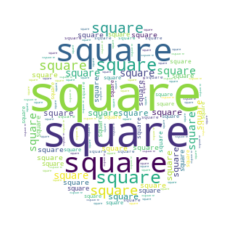

In [27]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = "square"

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)


wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(text)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

## 3.30+ 

In [42]:

import jieba
import nltk
import re

In [43]:

f = open('./data/29.txt')
word = f.read()
cleaned_data = ''.join(re.findall(r'[\u4e00-\u9fa5]', word))
#wordlist = jieba.lcut(cleaned_data)
#text = nltk.Text(wordlist)


Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.725 seconds.
Prefix dict has been built successfully.


AttributeError: 'Text' object has no attribute 'conordance'

In [56]:
def stopwordslist():
    stopwords = [line.strip() for line in open('./data/chinastop.txt',encoding='UTF-8').readlines()]
    return stopwords

def seg_depart(sentence):
    # 对文档中的每一行进行中文分词
    print("正在分词")
    sentence_depart = jieba.cut(sentence)
    # 创建一个停用词列表
    stopwords = stopwordslist()
    # 输出结果为outstr
    outstr = ''
    # 去停用词
    for word in sentence_depart:
        if word not in stopwords:
            if word != '\t':
                outstr += word
        outstr += " "
    return outstr

wordlist = seg_depart(cleaned_data)
text = nltk.Text(wordlist)

正在分词


In [52]:
text.concordance(word='范闲', width=20,lines =10)

no matches


In [53]:
text.common_contexts(['范闲','叶轻眉'])

('The following word(s) were not found:', '范闲 叶轻眉')


In [55]:
stopwordslist()

['',
 '"',
 '#',
 '$',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '--',
 '.',
 '...',
 '......',
 '...................',
 './',
 '.一',
 '.数',
 '.日',
 '/',
 '//',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 '://',
 '::',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 'Lex',
 'ZT',
 'ZZ',
 '[',
 ']',
 '_',
 "a's",
 'able',
 'about',
 'above',
 'according',
 'accordingly',
 'across',
 'actually',
 'after',
 'afterwards',
 'again',
 'against',
 "ain't",
 'all',
 'allow',
 'allows',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'an',
 'and',
 'another',
 'any',
 'anybody',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'apart',
 'appear',
 'appreciate',
 'appropriate',
 'are',
 "aren't",
 'around',
 'as',
 'aside',
 'ask',
 'asking',
 'associated',
 'at',
 'available',
 'away',
 'awfully',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',

In [49]:
text.similar(word='马车',num=10)

范闲 他 事情 人 身体 自己 京都 声音 皇宫 我
